### # Import imortant libraries

In [82]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

### # Make it to a Dataframe

In [83]:
df = pd.read_csv("Marketing campaign dataset.csv")
df_copy = df.copy()
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


### # Identify null columns that are completely empty


In [84]:
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,...,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,72612.000000,72612.000000,72612.000000,72612.000000,69200.000000,69200.000000,69200.000000,72612.000000,72612.000000,7.220600e+04,...,7406.0,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0
mean,3130.143282,27.036344,49.449127,7450.124842,267.810694,223.175578,83.082659,6195.862213,345.272861,1.258064e+05,...,1.0,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN
std,142.154918,25.479175,55.881324,4062.384982,92.848075,77.373396,20.847618,387.864576,23.707191,5.626204e+05,...,0.0,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,...,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,...,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,...,1.0,0.0,377.656676,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,...,1.0,0.0,755.313351,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,...,1.0,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [86]:
null_columns = df.columns[df.isnull().all()]
print(null_columns)

Index(['position_in_content', 'unique_reach', 'total_reach'], dtype='object')


### # Exploring Numerical Relationships

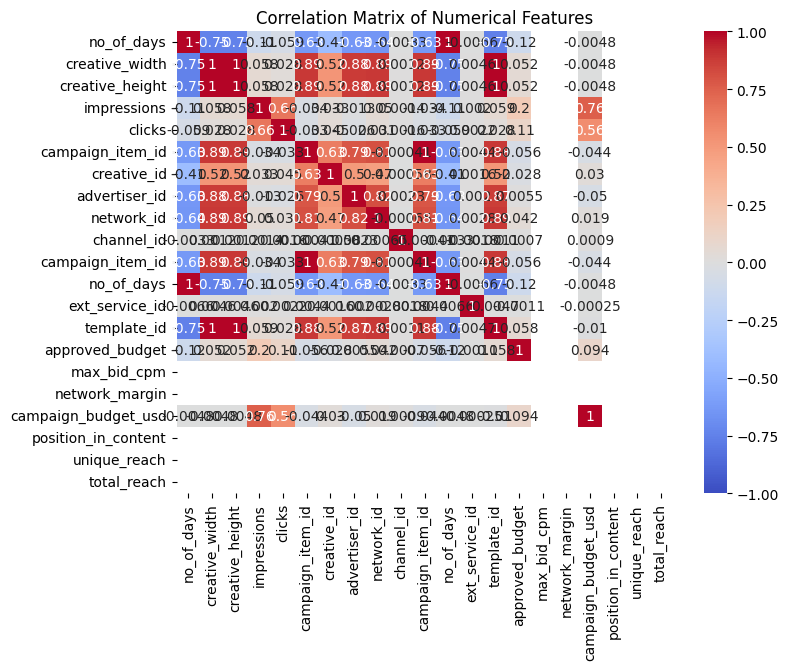

In [87]:
# Calculate correlation for numerical columns
correlation_matrix = df[['no_of_days', 'creative_width', 'creative_height', 'impressions', 'clicks', 'campaign_item_id',
                        'creative_id','advertiser_id','network_id', 'channel_id', 'campaign_item_id', 'no_of_days', 'ext_service_id','template_id'	,
                        'approved_budget', 'max_bid_cpm', 'network_margin',	'campaign_budget_usd',	'position_in_content','unique_reach','total_reach']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### # Exploring Categorical Patterns with Numerical Data

#### # Aggregation Analysis

In [88]:
# Average impressions and clicks by ext_service_name
service_summary = df.groupby('ext_service_name')[['impressions', 'clicks']].mean()
print("Average Impressions and Clicks by Service:\n", service_summary)

# Repeat for other categorical columns
advertiser_summary = df.groupby('advertiser_name')[['impressions', 'clicks']].mean()
print("Average Impressions and Clicks by Advertiser:\n", advertiser_summary)


Average Impressions and Clicks by Service:
                   impressions     clicks
ext_service_name                        
DV360             1394.322784  55.675313
Facebook Ads      1378.011123  53.540844
Google Ads        1338.111231  48.868576
Average Impressions and Clicks by Advertiser:
                   impressions       clicks
advertiser_name                           
Addis Ababa       1923.476562   140.695312
Al Ahmadi         2922.481818   136.727273
Almaza Bay        1249.093567    34.222222
Andhra Pradesh    4263.786691   154.793072
Bahrain            637.986087     8.235740
Bangalore          949.000000    49.333333
Brand              662.673674     9.695531
Cairo              863.527675    10.629151
Chandpur          2940.439252   186.663551
Chattogram        1369.398810    30.565476
Chennai          40285.000000  1372.000000
Coimbatore        2271.344086   449.376344
Delhi             1205.466667    81.800000
Gujarat           4395.909980   236.346380
Haryana         

#### # Identifying Temporal Patterns

In [89]:
df['time'] = pd.to_datetime(df['time'])
df['day_of_week'] = df['time'].dt.dayofweek
df['hour_of_day'] = df['time'].dt.hour

# Average impressions and clicks by day of the week
day_summary = df.groupby('day_of_week')[['impressions', 'clicks']].mean()
print("Average Impressions and Clicks by Day of the Week:\n", day_summary)

Average Impressions and Clicks by Day of the Week:
              impressions     clicks
day_of_week                        
0            1374.231698  51.766830
1            1403.049927  61.152023
2            1360.680104  53.489076
3            1359.988575  52.227224
4            1310.385450  48.972976
5            1357.288879  49.795981
6            1429.105124  51.736160


#### # Exploring Relationships with search_tags and keywords

In [90]:
search_tag_counts = df['search_tags'].value_counts()
keyword_counts = df['keywords'].value_counts()
print("Common Search Tags:\n", search_tag_counts.head())
print("Common Keywords:\n", keyword_counts.head())

Common Search Tags:
 search_tags
#The Ultimate Fashion Statement with X      12293
#Embrace Your Individuality with X          12279
#The Power of X                             12116
#Be Bold. Be X                              12077
#The X Factor - Fashion for the Fearless    11946
Name: count, dtype: int64
Common Keywords:
 keywords
beaded jewelry          674
minimalistic jewelry    669
initial jewelry         666
bangles                 666
stud earrings           662
Name: count, dtype: int64


#### # Identifying outliers in numerical Data

In [91]:
from scipy import stats
import numpy as np

# Calculate Z-scores and identify outliers
z_scores = np.abs(stats.zscore(df[['no_of_days', 'creative_width', 'creative_height', 'impressions', 'clicks']]))
outliers = df[(z_scores > 3).any(axis=1)]
print("Outliers:\n", outliers)

Outliers:
        campaign_item_id  no_of_days       time  ext_service_id  \
56                 2766         104 2022-07-21              16   
57                 2766         105 2022-07-22              16   
58                 2766         106 2022-07-23             128   
59                 2766         107 2022-07-24               4   
60                 2766         108 2022-07-25               4   
...                 ...         ...        ...             ...   
71745              3134          14 2022-09-01               4   
71746              3134          15 2022-09-02              16   
71747              3134          16 2022-09-03               4   
71748              3134          17 2022-09-04             128   
71749              3134          18 2022-09-05               4   

      ext_service_name  creative_id  creative_width  creative_height  \
56               DV360         1005             0.0              0.0   
57               DV360         1005             0.0 

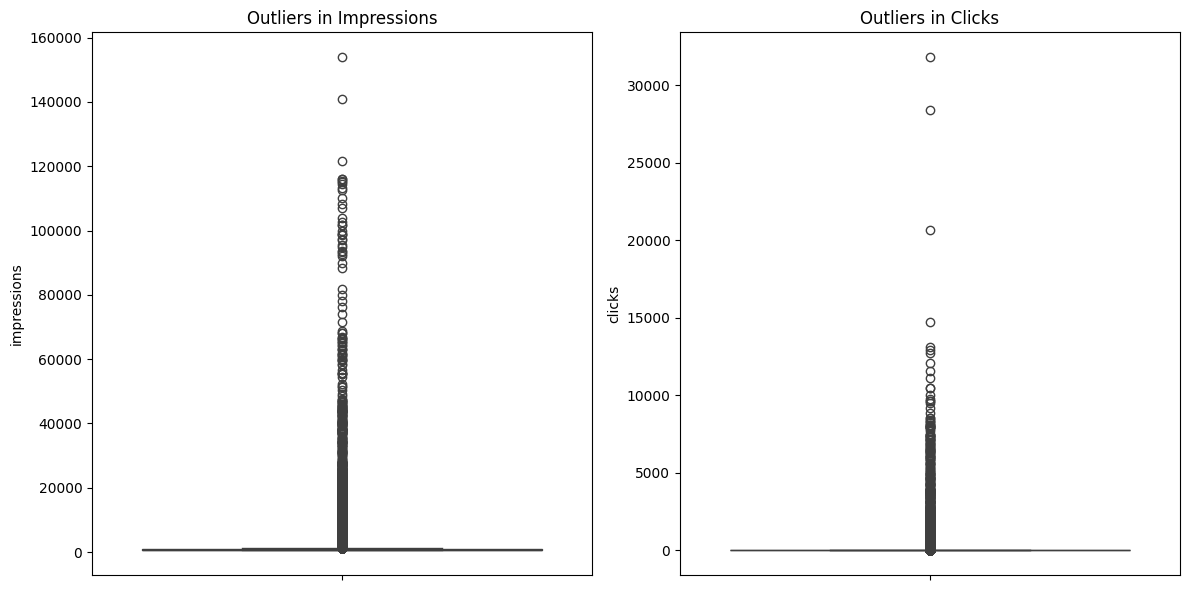

In [92]:
# Box plot for impressions and clicks to detect outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='impressions')
plt.title("Outliers in Impressions")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='clicks')
plt.title("Outliers in Clicks")

plt.tight_layout()
plt.show()

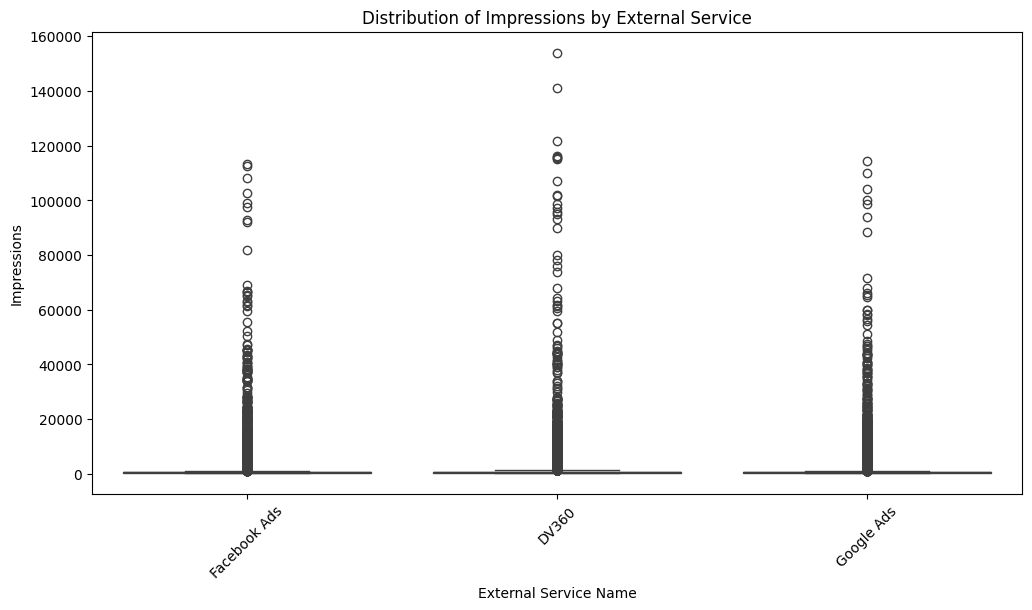

In [93]:
# Box plot of impressions by ext_service_name
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ext_service_name', y='impressions')
plt.xticks(rotation=45)
plt.title("Distribution of Impressions by External Service")
plt.ylabel("Impressions")
plt.xlabel("External Service Name")
plt.show()


### # Remove those columns and unneccassary columns

In [94]:
df = df.drop(null_columns,axis=1)
columns_to_drop = ["advertiser_id","campaign_item_id","channel_id","network_id", "ext_service_id",
                   "advertiser_currency","max_bid_cpm","campaign_budget_usd","currency_code",
                   "exchange_rate","media_cost_usd","cmi_currency_code","template_id","stats_currency","network_margin",
                    "stats_currency","approved_budget", "creative_id" ]
df = df.drop(columns_to_drop, axis=1)
df.head()

,no_of_days,time,ext_service_name,creative_width,creative_height,search_tags,landing_page,advertiser_name,channel_name,impressions,clicks,search_tag_cat,timezone,weekday_cat,keywords,day_of_week,hour_of_day
0,7,2022-05-01,Facebook Ads,300.0,250.0,#The Power of X,https://www.abcjewelry.com/collections/boho-je...,Web,Mobile,837,8,Others,Asia/Singapore,week_end,delicate bracelets,6,0
1,8,2022-05-02,DV360,300.0,250.0,#Be Bold. Be X,https://www.abcjewelry.com/women/costume-jewelry/,Web,Social,2634,44,Others,Asia/Singapore,week_day,summer jewelry,0,0
2,9,2022-05-03,Facebook Ads,300.0,250.0,#Embrace Your Individuality with X,https://www.abcjewelry.com/collections/boho-je...,Web,Social,2135,32,Others,Asia/Singapore,week_day,artisan jewelry,1,0
3,10,2022-05-04,Facebook Ads,300.0,250.0,#Be Bold. Be X,https://www.abcjewelry.com/collections/rhinest...,Web,Video,2327,48,Others,Asia/Singapore,week_day,layered bracelets,2,0
4,11,2022-05-05,Google Ads,300.0,250.0,#Be Bold. Be X,https://www.abcjewelry.com/collections/boho-je...,Web,Mobile,1538,20,Others,Asia/Singapore,week_day,minimalist jewelry,3,0


In [95]:
print(df.columns[df.isnull().any()])
null_counts = df.isnull().sum()
print("number of null values in columns\n", null_counts)

Index(['creative_width', 'creative_height'], dtype='object')
number of null values in columns
 no_of_days             0
time                   0
ext_service_name       0
creative_width      3412
creative_height     3412
search_tags            0
landing_page           0
advertiser_name        0
channel_name           0
impressions            0
clicks                 0
search_tag_cat         0
timezone               0
weekday_cat            0
keywords               0
day_of_week            0
hour_of_day            0
dtype: int64


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   no_of_days        72612 non-null  int64         
 1   time              72612 non-null  datetime64[ns]
 2   ext_service_name  72612 non-null  object        
 3   creative_width    69200 non-null  float64       
 4   creative_height   69200 non-null  float64       
 5   search_tags       72612 non-null  object        
 6   landing_page      72612 non-null  object        
 7   advertiser_name   72612 non-null  object        
 8   channel_name      72612 non-null  object        
 9   impressions       72612 non-null  int64         
 10  clicks            72612 non-null  int64         
 11  search_tag_cat    72612 non-null  object        
 12  timezone          72612 non-null  object        
 13  weekday_cat       72612 non-null  object        
 14  keywords          7261

In [97]:
total = df['creative_width'].shape[0]
null_count_column = df["creative_width"].isnull().sum()
print("number of null values:",null_count_column, "| Total records", total)


number of null values: 3412 | Total records 72612


#### # Since we have null values in both creative_width and creative_height, i assume that thare is no post on those creative id.
#### # so let's fill them with zero

In [98]:
# Fill null values in creative_width and creative_height with zero
df['creative_width'].fillna(0.0, inplace=True)
df['creative_height'].fillna(0.0, inplace=True)

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_18164\3883597281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creative_width'].fillna(0.0, inplace=True)
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_18164\3883597281.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [99]:
for col in ["channel_name", "advertiser_name", "search_tags", "weekday_cat", "ext_service_name","keywords", "search_tag_cat"]:
    unique_values = df[col].unique()
    print(f"Column '{col}' has unique values: {unique_values}")

Column 'channel_name' has unique values: ['Mobile' 'Social' 'Video' 'Display' 'Search']
Column 'advertiser_name' has unique values: ['Web' 'Brand' 'Luxor' 'Almaza Bay' 'USA' 'Karnataka' 'Maharashtra' 'Oman'
 'UAE' 'Cairo' 'Al Ahmadi' 'Addis Ababa' 'Vadodara' 'Chennai' 'Coimbatore'
 'Malad' 'Indore' 'Pali' 'Andhra Pradesh' 'Kuala Lumpur' 'Gujarat'
 'Chandpur' 'West Bengal' 'Tamil Nadu' 'Madhya Pradesh' 'Orissa' 'North'
 'Thailand' 'Singapore' 'Sohar' 'KSA' 'Qatar' 'Muscat' 'Kuwait' 'Bahrain'
 'Malaysia' 'Jeddah' 'Chattogram' 'Pan India' 'Bangalore' 'Delhi'
 'Haryana' 'Punjab' 'UP']
Column 'search_tags' has unique values: ['#The Power of X' '#Be Bold. Be X' '#Embrace Your Individuality with X'
 '#The Ultimate Fashion Statement with X'
 '#The X Factor - Fashion for the Fearless' '#Timeless X Style']
Column 'weekday_cat' has unique values: ['week_end' 'week_day']
Column 'ext_service_name' has unique values: ['Facebook Ads' 'DV360' 'Google Ads']
Column 'keywords' has unique values: ['delica

In [100]:
num_categories = {col: df[col].nunique() for col in df.columns}
print(num_categories)

{'no_of_days': 119, 'time': 224, 'ext_service_name': 3, 'creative_width': 2, 'creative_height': 2, 'search_tags': 6, 'landing_page': 45, 'advertiser_name': 44, 'channel_name': 5, 'impressions': 6624, 'clicks': 1284, 'search_tag_cat': 5, 'timezone': 7, 'weekday_cat': 2, 'keywords': 118, 'day_of_week': 7, 'hour_of_day': 1}


#### as we can see, we can use one hot coding for features with fewer categorical variables. the feature keyword needs to be embedded

#### # columns that has to be embedded

In [107]:
columns_embedding = ["channel_name", "advertiser_name", "search_tags",
                     "weekday_cat", "ext_service_name", "keywords", "search_tag_cat"]
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]


In [108]:
# Find unique categories per column
num_categories = {col: df[col].nunique() for col in columns_embedding}
print(num_categories)

{'channel_name': 5, 'advertiser_name': 44, 'search_tags': 6, 'weekday_cat': 2, 'ext_service_name': 3, 'keywords': 118, 'search_tag_cat': 5}


#### # Encode categorical columns

In [109]:
for col in columns_embedding:
    df[col] = df[col].astype('category').cat.codes
print(df)

       no_of_days       time  ext_service_name  creative_width  \
0               7 2022-05-01                 1           300.0   
1               8 2022-05-02                 0           300.0   
2               9 2022-05-03                 1           300.0   
3              10 2022-05-04                 1           300.0   
4              11 2022-05-05                 2           300.0   
...           ...        ...               ...             ...   
72607          11 2022-11-28                 2             0.0   
72608          12 2022-11-29                 1             0.0   
72609          13 2022-11-30                 1             0.0   
72610          14 2022-12-01                 2             0.0   
72611          15 2022-12-02                 0             0.0   

       creative_height  search_tags  \
0                250.0            2   
1                250.0            0   
2                250.0            1   
3                250.0            0   
4           

In [111]:
import torch
import torch.nn as nn

# Ensure all specified categorical columns are properly encoded as integer values
for col in columns_embedding:
    df[col] = df[col].astype('category').cat.codes

# Define embedding dimensions
embedding_dim = 4

# Create embedding layers for each categorical column
embedding_layers = {
    col: nn.Embedding(df[col].nunique(), embedding_dim) for col in columns_embedding
}

# Convert the categorical columns to a tensor with integer dtype
categorical_data = torch.tensor(df[columns_embedding].values, dtype=torch.long)

# Convert numerical columns to a tensor directly with float32 dtype
numerical_data = torch.tensor(df[numerical_columns].values, dtype=torch.float32)


In [ ]:
df.to_csv("final_dataset.csv", index=False)